In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1.Load the data file using pandas. 

In [4]:
app_data=pd.read_csv("googleplaystore.csv")
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# 2.Check for null values in the data. Get the number of null values for each column.

In [59]:
app_data.isnull()
app_data.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
# 3.Drop records with nulls in any of the columns.

In [8]:
app_data=app_data.dropna()
app_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
# 4 Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
    # a. changing value in Size in numeric dtype

In [55]:
size=[]
for x in app_data['Size']:
    if x!='Varies with device':
        if x[-1]=='M':
            x=x[:-1]
            x=float(x)*1000
        else:
            x=x[:-1]
            x=x.replace(",","")
            x=float(x)
    size.append(x) 
print(len(size))
app_data=app_data.drop(app_data[app_data['Size']=='Varies with device'].index)
len(app_data['Size'])
app_data['Size']=size        
app_data['Size']

7723


0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size, Length: 7723, dtype: float64

In [ ]:
   #b Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float). 

In [61]:
app_data['Reviews']=app_data['Reviews'].astype('int')
app_data['Reviews'].dtype

dtype('int64')

In [ ]:
  #c Installs field is currently stored as string and has values like 1,000,000+. make it numeric and values like 1000000

In [63]:
app_data['Installs'] = app_data['Installs'].str.replace(',','').str.replace('+','').astype('int')

In [65]:
app_data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

In [ ]:
    #d Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [67]:
app_data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [69]:
app_data['Price']=app_data['Price'].str.replace('$','').astype('float')

In [71]:
app_data['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [ ]:
#5 Sanity checks:
    #a. rating should be in between 1 and 5

In [73]:
app_data = app_data.drop(app_data[(app_data['Rating'] < 1) | (app_data['Rating'] > 5)].index)
print(app_data['Rating'].min(),app_data['Rating'].max())

1.0 5.0


In [ ]:
    #b. Reviews should not be more than installs as only those who installed can review the app., drop them.

In [75]:
app_data=app_data.drop(app_data[app_data['Reviews']>app_data['Installs']].index)


In [77]:
app_data[app_data['Reviews']>app_data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
    #c. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [79]:
app_data = app_data.drop(app_data[(app_data['Type'] == 'Free') & (app_data['Price'] > 0)].index)

In [81]:
app_data[(app_data['Type'] == 'Free') & (app_data['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
#6 Boxplot for Price

In [83]:
app_data['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=app_data['Price'],data=app_data)
plt.xticks(range(1, 501, 20),rotation=45)
plt.show()

In [ ]:
# 6 Boxplot for Reviews

In [85]:
app_data['Reviews'].describe()

count    7.717000e+03
mean     2.951275e+05
std      1.864640e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.351000e+03
75%      3.910900e+04
max      4.489389e+07
Name: Reviews, dtype: float64

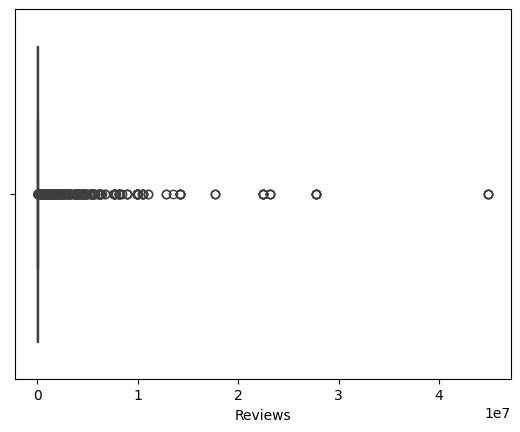

In [87]:
sns.boxplot(x=app_data['Reviews'],data=app_data)
#plt.xticks(range(1, 500, 20),rotation=45)
plt.show()

In [ ]:
#6 Histogram for Ratings

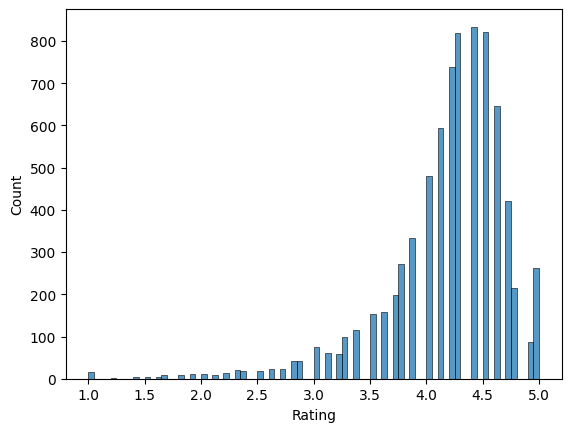

In [89]:
sns.histplot(x=app_data['Rating'],data=app_data)
plt.show()

In [ ]:
#6 Histogram for Size 

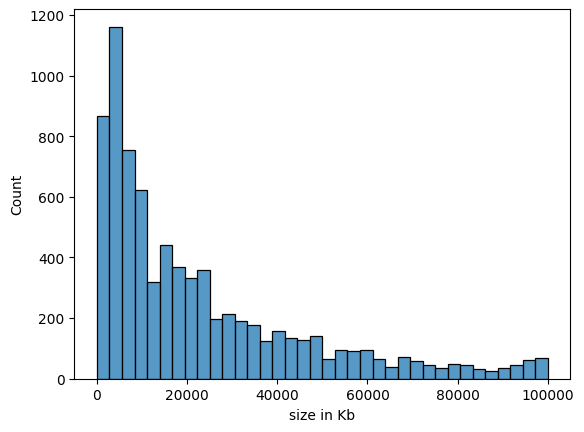

In [91]:
sns.histplot(x=app_data['Size'],data=app_data)
plt.xlabel('size in Kb')
plt.show()

In [ ]:
#6 Outlier treatment:

In [ ]:
    #a. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
        #Check out the records with very high price
        #Is 200 indeed a high price? Ans = Yes , they are mostly outliers 
        #Drop these as most seem to be junk apps

In [93]:
app_data['Price'].shape

(7717,)

In [95]:
app_data[app_data['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [97]:
app_data[app_data['Price']>200].shape

(15, 13)

In [99]:
app_data=app_data.drop(app_data[app_data['Price']>200].index)

In [101]:
app_data['Price'].shape

(7702,)

In [ ]:
    #b. Reviews: Very few apps have very high number of reviews. 
        #These are all star apps that don’t help with the analysis and, in fact, will skew it.
        #Drop records having more than 2 million reviews.

In [103]:
app_data[app_data['Reviews']>2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [105]:
app_data=app_data.drop(app_data[app_data['Reviews']>2000000].index)

In [107]:
app_data[app_data['Reviews']>2000000].describe()

,Rating,Reviews,Size,Installs,Price
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [ ]:
    #Installs:There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
            #Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
            #Decide a threshold as cutoff for outlier and drop records having values more than that

In [109]:
app_data['Installs'].describe()

count    7.483000e+03
mean     3.947465e+06
std      2.781831e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [111]:
percentiles = [10, 25, 50, 70, 90, 95, 99]

In [113]:
percentiles_values = np.percentile(app_data['Installs'], percentiles)
percentiles_values

array([1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+07, 5.e+07])

In [115]:
for p, value in zip(percentiles, percentiles_values):
    print(f"{p}th percentile: {value}")

10th percentile: 1000.0
25th percentile: 10000.0
50th percentile: 100000.0
70th percentile: 1000000.0
90th percentile: 10000000.0
95th percentile: 10000000.0
99th percentile: 50000000.0


In [ ]:
# 99th percentile value can be taken as thresold that is  50000000.0

In [117]:
app_data = app_data[app_data['Installs'] <=  50000000.0]

In [119]:
app_data.shape

(7423, 13)

In [ ]:
# 7 Bivariate analysis:

In [ ]:
    # Make scatter plot/joinplot for Rating vs. Price

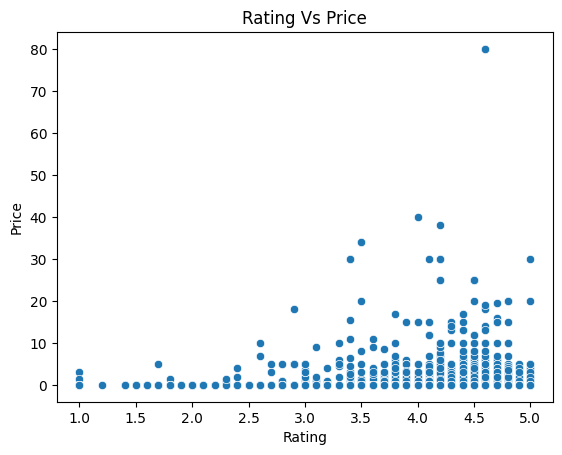

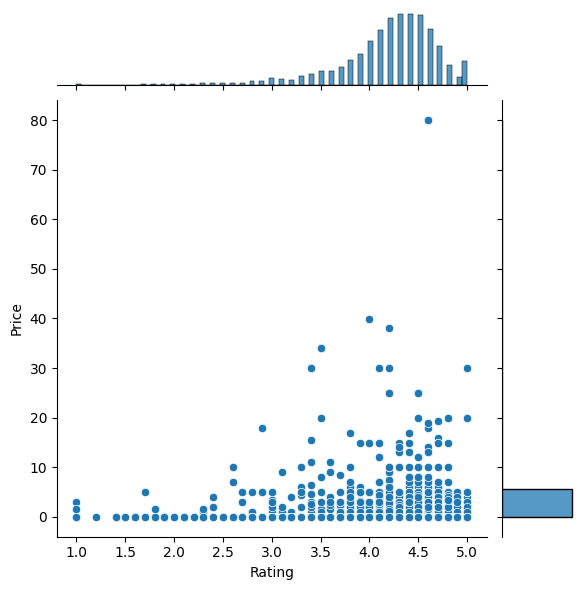

In [121]:
sns.scatterplot(x=app_data['Rating'],y=app_data['Price'],data=app_data,legend=True)
plt.title('Rating Vs Price')
sns.jointplot(x=app_data['Rating'],y=app_data['Price'],data=app_data,legend=True)
plt.show()

# form the plot above, rating does not increase with price

In [ ]:
    # Make scatter plot/joinplot for Rating vs. Size

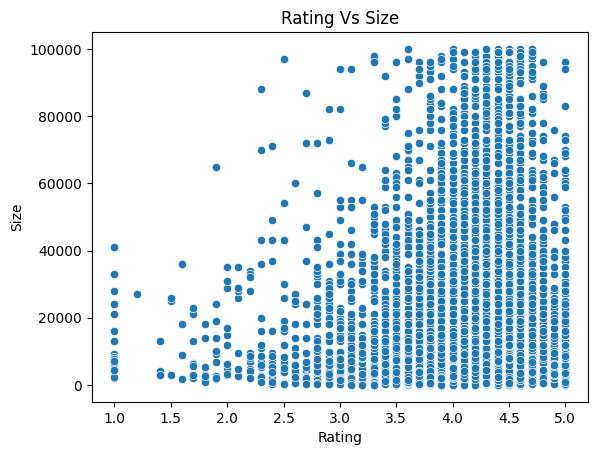

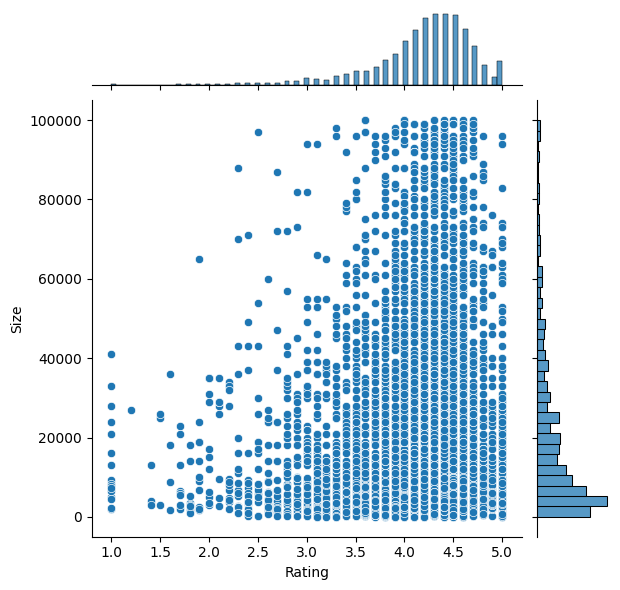

In [123]:
sns.scatterplot(x=app_data['Rating'],y=app_data['Size'],data=app_data,legend=True)
plt.title('Rating Vs Size')
sns.jointplot(x=app_data['Rating'],y=app_data['Size'],data=app_data,legend=True)
plt.show()

# from the plot above, less size apps have less ratings than the big size apps and are likely to be rated lower

In [ ]:
    # Make scatter plot/joinplot for Rating vs. Reviews

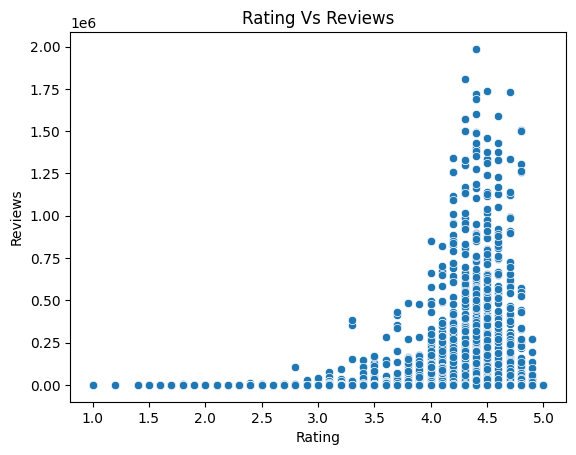

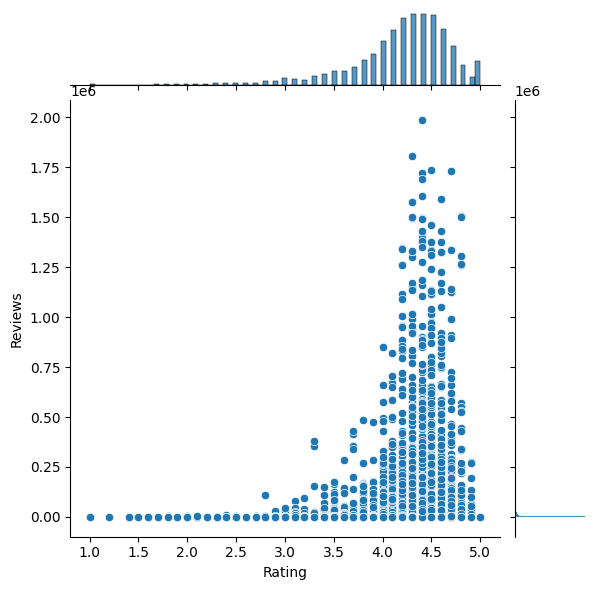

In [125]:
sns.scatterplot(x=app_data['Rating'],y=app_data['Reviews'],data=app_data,legend=True)
plt.title('Rating Vs Reviews')
sns.jointplot(x=app_data['Rating'],y=app_data['Reviews'],data=app_data,legend=True)
plt.show()

# from the plot above, apps with the most reviews are rated highly

In [ ]:
    # Make boxplot for Rating vs. Content Rating

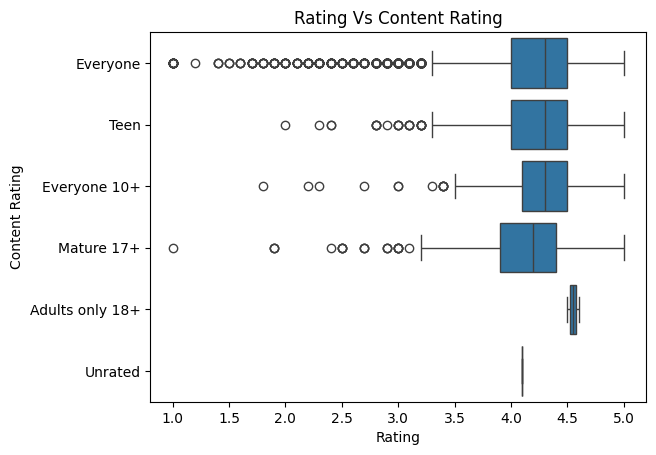

In [127]:
sns.boxplot(x=app_data['Rating'],y=app_data['Content Rating'],data=app_data,legend=False)
plt.title('Rating Vs Content Rating')
plt.show()

# frome above plot , Apps for Teens are generally rated higher than others, while the apps for Everyone show a large variance in rating

In [ ]:
    # Make boxplot for Ratings vs. Category

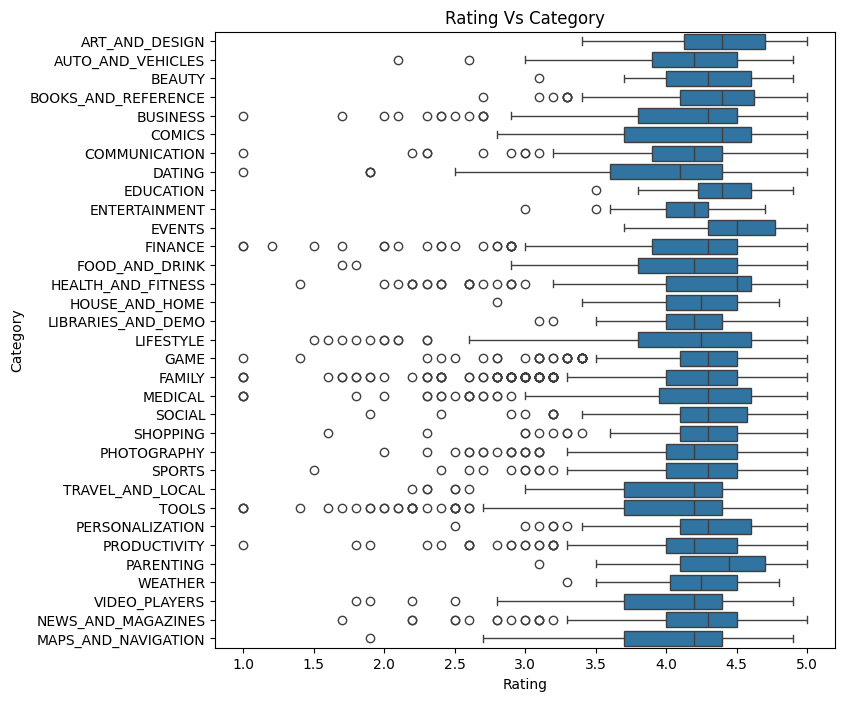

In [129]:
plt.figure(figsize=(8,8))
sns.boxplot(x=app_data['Rating'],y=app_data['Category'],data=app_data,legend=False)
plt.title('Rating Vs Category')
plt.show()

# Apps for parenting and events show the highest ratings

In [ ]:
# 8 Data preprocessing

In [131]:
inp1 = app_data.copy().reset_index()

In [ ]:
    # Reviews and Install have some values that are still relatively very high. Before building a linear regression model, 
    #you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [133]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

In [ ]:
    # Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [135]:
inp1.drop(columns = ['index', 'App', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)

In [137]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [139]:
inp1.shape

(7423, 9)

In [ ]:
    # Get dummy columns for Category, Genres, and Content Rating. 
    #This needs to be done as the models do not understand categorical data, 
    #and all data should be numeric. 
    #Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [141]:
categorical_cols = ['Category', 'Genres', 'Content Rating', 'Type']

inp2 = pd.get_dummies(inp1, columns=categorical_cols, drop_first=True)

In [143]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid
0,4.1,5.075174,19000.0,9.210440,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,3.9,6.875232,14000.0,13.122365,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,4.7,11.379520,8700.0,15.424949,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,4.5,12.281389,25000.0,17.727534,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,4.3,6.875232,2800.0,11.512935,0.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# 9 Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [145]:
from sklearn.model_selection import train_test_split
app_data_train, app_data_test = train_test_split(inp2, train_size = 0.7, random_state = 32)

In [149]:
app_data_train.shape, app_data_test.shape

((5196, 154), (2227, 154))

In [ ]:
# 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [159]:
X_train = app_data_train.drop(['Rating'], axis=1)
y_train = app_data_train['Rating']

X_test = app_data_test.drop(['Rating'], axis=1)
y_test = app_data_test['Rating']

In [ ]:
# 11.1 Model building
# Use linear regression as the technique

In [169]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 11.2 
# Report the R2 on the train set

In [167]:
train_r2 = lr.score(X_train, y_train)
print("R² on the training set:", train_r2)

R² on the training set: 0.16242810123511842


In [ ]:
# 12 Make predictions on test set and report R2.

In [165]:
y_pred_test = lr.predict(X_test)
test_r2 = lr.score(X_test, y_test)
print("R² on the test set:", test_r2)

R² on the test set: 0.11085399811599217
